In [1]:
# Step 1: Installation
!pip install nltk

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Step 2: Load the Dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\IMDB Dataset.csv\IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


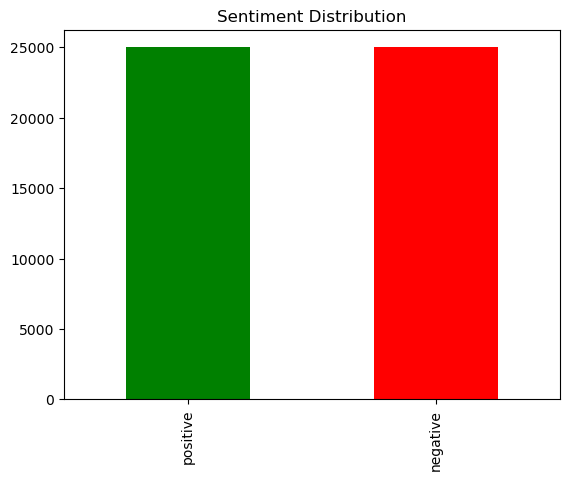

In [7]:
# Step 3: Basic EDA
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.show()



In [13]:
# Step 4: Preprocess the Text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('<.*?>', '', text)  # remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove non-letters
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Step 5: Encode Labels
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [15]:
# Step 6: Train/Test Split
X = df['clean_review']
y = df['label']

# Convert text to vector
vectorizer = CountVectorizer(max_features=5000)
X_vector = vectorizer.fit_transform(X).toarray()

# Split
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.2, random_state=42)


In [16]:
# Step 7: Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8744
Confusion Matrix:
 [[4311  650]
 [ 606 4433]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## 🎯 Insights & Observations

- The model achieved high accuracy in classifying IMDb reviews.
- Logistic Regression performed well on binary sentiment tasks.
- Words like "great", "love", "amazing" strongly associated with positive reviews.
- Common negative triggers include "boring", "worst", "waste", etc.

📦 Submitted as Task 4 – Sentiment Analysis using IMDb Dataset (CODTECH Internship)